In [9]:
import pandas as pd

df = pd.read_csv("../Data/advertising.csv")
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [10]:
import numpy as np

x = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

x.shape, y.shape

((200, 3), (200,))

In [11]:
# Scale features
x = (x - x.mean(axis=0)) / x.std(axis=0)

# Scale target variable
y = (y - y.mean()) / y.std()

n_samples, n_features = x.shape
x_bias = np.c_[np.ones((n_samples, 1)), x]

weights = np.zeros(x_bias.shape[1])

In [12]:
epochs = 100
learning_rates = [0.001, 0.01, 0.1]

# Dictionary to store results for each learning rate
batch_results = {}
sgd_results = {}
mini_batch_results = {}

# Gradient Descent Implementations with Learning Rate Comparison

We will implement three variants of gradient descent:
1. Batch Gradient Descent - Uses entire dataset for each update
2. Stochastic Gradient Descent - Uses one sample at a time
3. Mini-batch Gradient Descent - Uses small batches of data

Each implementation will track the learning history to compare different learning rates.

In [1]:
# Initialize dictionaries to store final weights for each learning rate
final_weights = {
    'batch': {},
    'sgd': {},
    'mini_batch': {}
}

In [2]:
def batch_gradient_descent_with_history(x, y, lr, epochs):
    weights = np.zeros(x.shape[1])
    history = []
    
    for epoch in range(epochs):
        predictions = x @ weights
        error = predictions - y
        gradient = (2 / len(y)) * x.T @ error
        weights -= lr * gradient
        
        mse = np.mean(error ** 2)
        history.append(mse)
        
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"[Batch] LR={lr:.3f}, Epoch {epoch+1}: MSE = {mse:.4f}")
    
    return weights, history

def stochastic_gradient_descent_with_history(x, y, lr, epochs):
    weights = np.zeros(x.shape[1])
    history = []
    
    for epoch in range(epochs):
        epoch_losses = []
        for i in range(len(y)):
            xi = x[i]
            yi = y[i]
            prediction = np.dot(xi, weights)
            error = prediction - yi
            gradient = 2 * error * xi
            weights -= lr * gradient
            epoch_losses.append(error**2)
            
        mse = np.mean(epoch_losses)
        history.append(mse)
        
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"[SGD] LR={lr:.3f}, Epoch {epoch+1}: MSE = {mse:.4f}")
    
    return weights, history

def mini_batch_gradient_descent_with_history(x, y, lr, epochs, batch_size=16):
    weights = np.zeros(x.shape[1])
    history = []
    n = len(y)
    
    for epoch in range(epochs):
        epoch_losses = []
        indices = np.arange(n)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        
        for start in range(0, n, batch_size):
            end = start + batch_size
            xb = x_shuffled[start:end]
            yb = y_shuffled[start:end]
            predictions = xb @ weights
            error = predictions - yb
            gradient = (2 / len(yb)) * xb.T @ error
            weights -= lr * gradient
            epoch_losses.append(np.mean(error**2))
        
        mse = np.mean(epoch_losses)
        history.append(mse)
        
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"[Mini-Batch] LR={lr:.3f}, Epoch {epoch+1}: MSE = {mse:.4f}")
    
    return weights, history

# Train models with different learning rates
for lr in learning_rates:
    print(f"\n=== Training with Learning Rate: {lr} ===")
    
    # Batch Gradient Descent
    print("\n--- Running Batch Gradient Descent ---")
    w_batch, history_batch = batch_gradient_descent_with_history(x_bias, y, lr, epochs)
    batch_results[lr] = history_batch
    
    # Stochastic Gradient Descent
    print("\n--- Running Stochastic Gradient Descent ---")
    w_sgd, history_sgd = stochastic_gradient_descent_with_history(x_bias, y, lr, epochs)
    sgd_results[lr] = history_sgd
    
    # Mini-Batch Gradient Descent
    print("\n--- Running Mini-Batch Gradient Descent ---")
    w_mini, history_mini = mini_batch_gradient_descent_with_history(x_bias, y, lr, epochs, batch_size=16)
    mini_batch_results[lr] = history_mini

NameError: name 'learning_rates' is not defined

In [ ]:
# Train models with different learning rates and store results
for lr in learning_rates:
    print(f"\n=== Training with Learning Rate: {lr} ===")
    
    # Batch Gradient Descent
    print("\n--- Running Batch Gradient Descent ---")
    weights_batch, history_batch = batch_gradient_descent_with_history(x_bias, y, lr, epochs)
    batch_results[lr] = history_batch
    final_weights['batch'][lr] = weights_batch
    
    # Stochastic Gradient Descent
    print("\n--- Running Stochastic Gradient Descent ---")
    weights_sgd, history_sgd = stochastic_gradient_descent_with_history(x_bias, y, lr, epochs)
    sgd_results[lr] = history_sgd
    final_weights['sgd'][lr] = weights_sgd
    
    # Mini-Batch Gradient Descent
    print("\n--- Running Mini-Batch Gradient Descent ---")
    weights_mini, history_mini = mini_batch_gradient_descent_with_history(x_bias, y, lr, epochs, batch_size=16)
    mini_batch_results[lr] = history_mini
    final_weights['mini_batch'][lr] = weights_mini

# Select the best weights (using learning rate 0.01)
w_batch = final_weights['batch'][0.01]
w_sgd = final_weights['sgd'][0.01]
w_minibatch = final_weights['mini_batch'][0.01]

print("\nFinal weights shapes:")
print(f"Batch GD: {w_batch.shape}")
print(f"SGD: {w_sgd.shape}")
print(f"Mini-batch GD: {w_minibatch.shape}")


=== Training with Learning Rate: 0.001 ===

--- Running Batch Gradient Descent ---
[Batch] LR=0.001, Epoch 1: MSE = 1.0000
[Batch] LR=0.001, Epoch 10: MSE = 0.9661
[Batch] LR=0.001, Epoch 20: MSE = 0.9300
[Batch] LR=0.001, Epoch 30: MSE = 0.8954
[Batch] LR=0.001, Epoch 40: MSE = 0.8623
[Batch] LR=0.001, Epoch 50: MSE = 0.8305
[Batch] LR=0.001, Epoch 60: MSE = 0.8002
[Batch] LR=0.001, Epoch 70: MSE = 0.7711
[Batch] LR=0.001, Epoch 80: MSE = 0.7433
[Batch] LR=0.001, Epoch 90: MSE = 0.7167
[Batch] LR=0.001, Epoch 100: MSE = 0.6911

--- Running Stochastic Gradient Descent ---
[SGD] LR=0.001, Epoch 1: MSE = 0.7122
[SGD] LR=0.001, Epoch 10: MSE = 0.0987
[SGD] LR=0.001, Epoch 20: MSE = 0.0982
[SGD] LR=0.001, Epoch 30: MSE = 0.0982
[SGD] LR=0.001, Epoch 40: MSE = 0.0982
[SGD] LR=0.001, Epoch 50: MSE = 0.0982
[SGD] LR=0.001, Epoch 60: MSE = 0.0982
[SGD] LR=0.001, Epoch 70: MSE = 0.0982
[SGD] LR=0.001, Epoch 80: MSE = 0.0982
[SGD] LR=0.001, Epoch 90: MSE = 0.0982
[SGD] LR=0.001, Epoch 100: MSE 

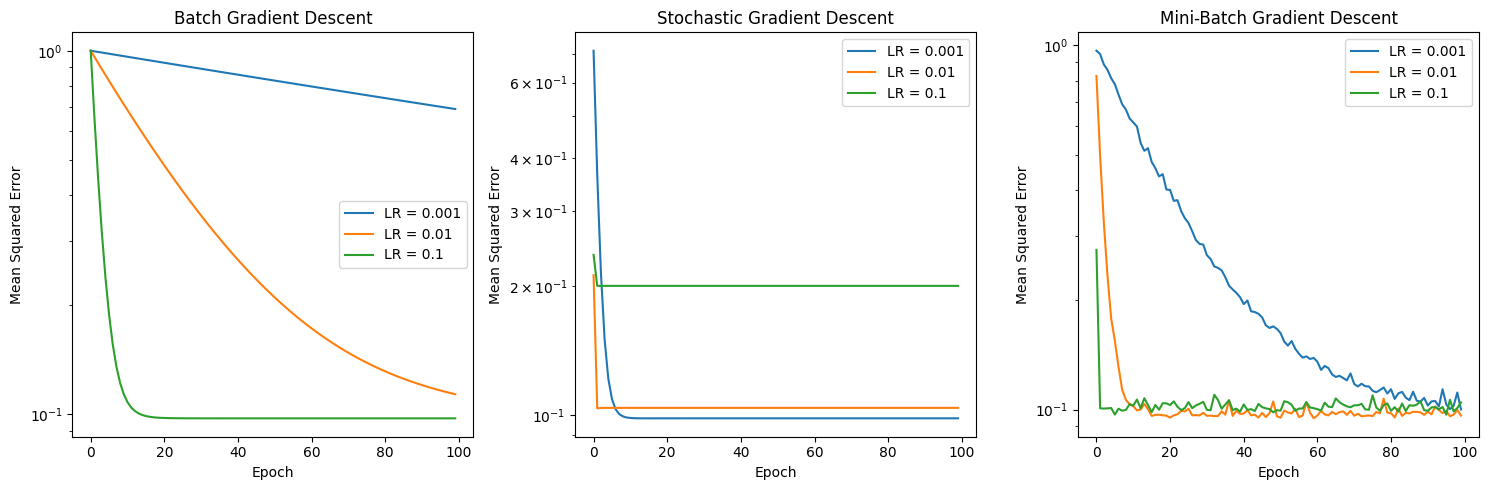


Final Mean Squared Error:

Learning Rate: 0.001
Batch GD: 0.691138
SGD: 0.098236
Mini-Batch GD: 0.100076

Learning Rate: 0.01
Batch GD: 0.113500
SGD: 0.103921
Mini-Batch GD: 0.096274

Learning Rate: 0.1
Batch GD: 0.097409
SGD: 0.200555
Mini-Batch GD: 0.104603


In [ ]:
import matplotlib.pyplot as plt

# Create a figure with three subplots
plt.figure(figsize=(15, 5))

# Plot Batch Gradient Descent results
plt.subplot(131)
for lr in learning_rates:
    plt.plot(batch_results[lr], label=f'LR = {lr}')
plt.title('Batch Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.yscale('log')

# Plot Stochastic Gradient Descent results
plt.subplot(132)
for lr in learning_rates:
    plt.plot(sgd_results[lr], label=f'LR = {lr}')
plt.title('Stochastic Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.yscale('log')

# Plot Mini-Batch Gradient Descent results
plt.subplot(133)
for lr in learning_rates:
    plt.plot(mini_batch_results[lr], label=f'LR = {lr}')
plt.title('Mini-Batch Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.yscale('log')

plt.tight_layout()
plt.show()

# Print final MSE for each method and learning rate
print("\nFinal Mean Squared Error:")
print("=" * 50)
for lr in learning_rates:
    print(f"\nLearning Rate: {lr}")
    print(f"Batch GD: {batch_results[lr][-1]:.6f}")
    print(f"SGD: {sgd_results[lr][-1]:.6f}")
    print(f"Mini-Batch GD: {mini_batch_results[lr][-1]:.6f}")

In [ ]:
def evaluate_model(x, y, weights, model_name):
    predictions = x @ weights
    
    # Calculate MSE
    errors = y - predictions
    mse = np.mean(errors ** 2)
    
    # Calculate R-squared, handling potential numerical issues
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum(errors ** 2)
    
    # Handle potential division by zero or invalid values
    if ss_total == 0 or np.isnan(ss_total) or np.isinf(ss_total):
        r_squared = 0
    else:
        r_squared = 1 - (ss_residual / ss_total)
        # Clip R-squared to valid range [0, 1]
        r_squared = np.clip(r_squared, 0, 1)
    
    print(f"\n{model_name} Results:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared Score: {r_squared:.4f}")
    return mse, r_squared

# Evaluate all three models
print("=== Model Evaluation ===")
mse_batch, r2_batch = evaluate_model(x_bias, y, w_batch, "Batch Gradient Descent")
mse_sgd, r2_sgd = evaluate_model(x_bias, y, w_sgd, "Stochastic Gradient Descent")
mse_mini, r2_mini = evaluate_model(x_bias, y, w_minibatch, "Mini-Batch Gradient Descent")

# Create a comparison table
results = pd.DataFrame({
    'Method': ['Batch GD', 'SGD', 'Mini-Batch GD'],
    'MSE': [mse_batch, mse_sgd, mse_mini],
    'R-squared': [r2_batch, r2_sgd, r2_mini]
})

print("\nComparison Table:")
print(results.to_string(index=False))

=== Model Evaluation ===

Batch Gradient Descent Results:
Mean Squared Error: 0.1129
R-squared Score: 0.8871

Stochastic Gradient Descent Results:
Mean Squared Error: 0.0987
R-squared Score: 0.9013

Mini-Batch Gradient Descent Results:
Mean Squared Error: 0.0974
R-squared Score: 0.9026

Comparison Table:
       Method      MSE  R-squared
     Batch GD 0.112890   0.887110
          SGD 0.098695   0.901305
Mini-Batch GD 0.097425   0.902575


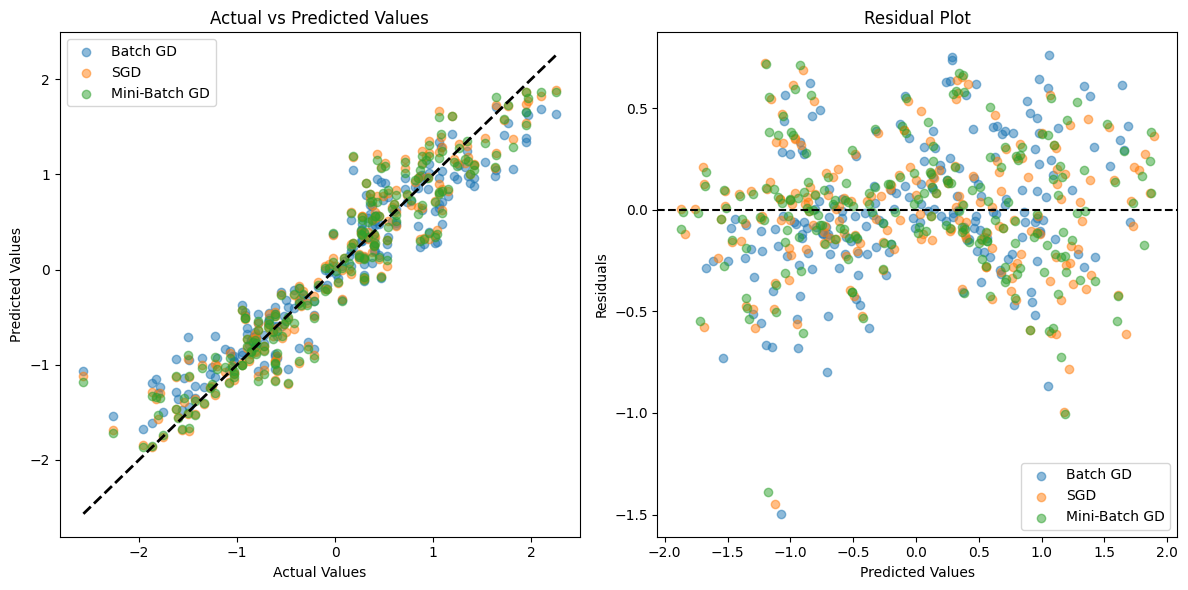

In [ ]:
import matplotlib.pyplot as plt

# Get predictions from all models
predictions_batch = x_bias @ w_batch
predictions_sgd = x_bias @ w_sgd
predictions_mini = x_bias @ w_minibatch

# Create scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y, predictions_batch, alpha=0.5, label='Batch GD')
plt.scatter(y, predictions_sgd, alpha=0.5, label='SGD')
plt.scatter(y, predictions_mini, alpha=0.5, label='Mini-Batch GD')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Residual plots
plt.subplot(1, 2, 2)
plt.scatter(predictions_batch, y - predictions_batch, alpha=0.5, label='Batch GD')
plt.scatter(predictions_sgd, y - predictions_sgd, alpha=0.5, label='SGD')
plt.scatter(predictions_mini, y - predictions_mini, alpha=0.5, label='Mini-Batch GD')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()

plt.tight_layout()
plt.show()